# ¿Por qué simular?

La simulación estocástica es una herramienta que nos permite “jugar” con el azar en la computadora para entender mejor cómo funcionan los fenómenos aleatorios. Muchas veces, calcular probabilidades exactas es complicado, pero con la simulación podemos generar experimentos (como lanzar miles de monedas o modelar la espera en una fila) y observar cómo se cumplen en la práctica las leyes probabilistas. Por esto, la simulación no solo nos ayuda a resolver problemas difíciles, sino que también nos da intuición y una forma visual y práctica de aprender probabilidad.

Pensemos en el siguiente experimento aleatorio.

Hay una urna en donde hay 2 negras y 1 blanca. Elijes una bola al azar y pasa lo siguiente:

* Si la bola es negra, ganas \$1,000
* Si la bola es blanca, pierdes \$1,500

¿Juegas? ¿Qué es lo que podría pasar? El objetivo de este cuaderno es dar las herramientas para poder simular este evento y ver cuál es la mejor estrategia frente a este reto.


### Elegir *aleatoriamente* de una muestra

La idea es simple: elegir un elemento al azar (de manera equiprobable) de un conjunto dado.

En Python, usaremos la librería $\texttt{random}$ cuando usemos elementos de probabilidad. Para este caso, seguimos los siguientes pasos:

1. Definimos y almacenamos nuestra lista en Python.
2. Usamos la función $\texttt{random.choice(lista)}$ y la guardamos como una variable

Veamos algunos ejemplos


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Definimos la lista
lista = [0,1,2,3,4,5,6,7,8,9]

# Elegimos un elemento aleatorio con la función
u = random.choice(lista)

# Imprimimos el elemento
print(u)

8


¿Cómo lo hacemos sin usar la función $\texttt{random.choice}$?

Siempre podemos pedirle a la computadora un número aleatorio entre 0 y 1, para ello usaremos la función $\texttt{random.random()}$, la cual será muy utilizada en este cuaderno.


In [ ]:
# Imprimimos 10 números aleatorios entre 0 y 1
print([random.random() for _ in range(10)])

[0.613729276969032, 0.12155610426248908, 0.7262222480734314, 0.23012139370630813, 0.3251525209917604, 0.9381154091040838, 0.09798200908860821, 0.1616983480646197, 0.4668314089426897, 0.270660229755338]


Pensemos en el caso de una lista con dos elementos y a continuación explicaremos cómo elegir uno de ellos aleatoriamente.

**Pseudo-Código para elegir aleatoriamente de una muestra de 2**

La idea es simple: dada una lista de dos elementos, devolver alguno de los dos de manera equiprobable. Con este fin, seguiremos los siguientes pasos:

1. Generar un número aleatorio $u$ entre 0 y 1.
2. Si $u<\frac{1}{2}$, entonces elegimos el primer elemento. En caso contrario, seleccionamos el segundo.

Veamos este procedimiento en acción

In [ ]:
# Definimos la lista
lista = [0,1]

# Generamos un número aleatorio entre 0 y 1
u = random.random()

# Verificamos la condición y elegimos
eleccion = None
if u < 0.5:
  eleccion = lista[0]
else:
  eleccion = lista[1]

# Imprimos la elección
print(eleccion)

0


Para ver que efectivamente lo hace de manera equiprobable, podemos hacer el experimento muchas veces y graficar los resultados. Para eso, definimos la siguiente función

In [ ]:
def elegirdedos(lista):

  # Si la lista no contiene dos elementos, lanza un error
  if len(lista) != 2:
    raise Exception("La lista debe tener 2 elementos")

  # Genera un número aleatorio entre 0 y 1
  u = random.random()

  # Verifica la condición y regresa la elección
  eleccion = None
  if u < 0.5:
    eleccion = lista[0]
  else:
    eleccion = lista[1]
  return eleccion

Ahora graficamos

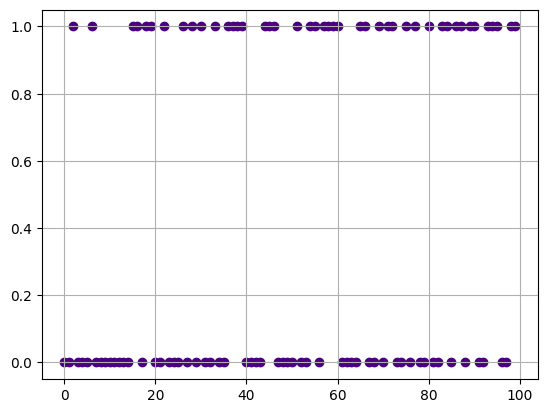

In [ ]:
import matplotlib.pyplot as plt

intentos = 100
dominio = range(intentos)
codominio = [elegirdedos([0,1]) for _ in dominio]

plt.figure()
plt.scatter(dominio, codominio, color = 'indigo')
plt.grid()
plt.show()

Ahora probemos con algunas listas

In [ ]:
lista1 = ['uno', 1]
lista2 = [{1: 'superior 1', 2: 'superior 2', 3: 'lineal 1', 4: 'lineal 2'}, 'ciencias']
lista3 = [[1,2,3], 912312323]

elegirdedos(lista1), elegirdedos(lista2), elegirdedos(lista3)

(1, 'ciencias', [1, 2, 3])

**Generalización**
En general, para poder elegir aleatoriamente de un conjunto de $n$ elementos para cualquiero $n \in \mathbb{N}$, tenemos que seguir un procedimiento análogo.

**Pseudo-Código para elegir aleatoriamente de una lista**

La idea es análoga a lo anterior, dada una lista en Python $\texttt{[x_1, x_2, ..., x_n]}$, queremos obtener algún elemento $x_k$ para algún $k \leq n$.

1. Simular un número aleatorio $u$ entre 0 y 1.
2. Dividir al intervalo $[0,1]$ en $n$ pedazos de igual longitud.
3. Elegir $k$ como el número de intervalos entre 0 y $u$.

Veamos este problema en acción, usando algunas funciones de la librería $\texttt{numpy}$.

In [ ]:
import numpy as np

# Definimos la lista
lista10 = [1,2,3,4,5,6,7,8,9,10]
n = len(lista10)
# División del [0,1] en n+1 pedazos
division = np.linspace(0,1,n+1)
# Número aleatorio entre 0 y 1
u = random.random()
k = None

# Verificamos la condición de la partición
for i in range(len(division)):
  if division[i] <= u < division[i+1]:
    k = i

# Imprimimos el valor elegido
print(lista10[k])

7


Ahora veamos este experimento en varios lanzamientos con la siguiente función.

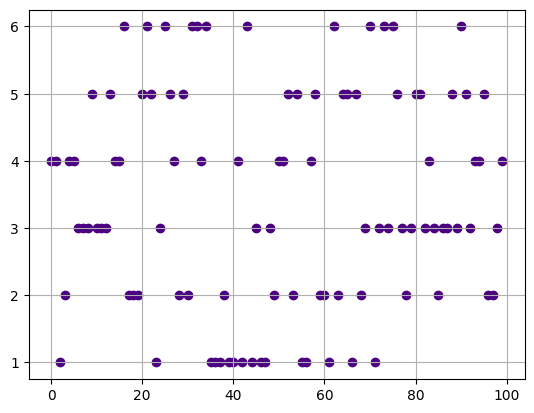

In [ ]:
# Definimos una función análoga al procedimiento anterior
def elegirde(lista):
  n = len(lista)
  division = np.linspace(0,1,n+1)
  u = random.random()
  k = None
  for i in range(len(division)):
    if division[i] <= u < division[i+1]:
      k = i
  return lista[k]

# Definimos dominio y rango para el experimento
lista = [1,2,3,4,5,6]
intentos2 = 100
dominio2 = range(intentos2)
codominio2 = [elegirde(lista) for _ in dominio2]

# Graficamos los resultados
plt.figure()
plt.scatter(dominio2, codominio2, color = 'indigo')
plt.grid()
plt.show()

Puedo filtrar para contar el número de veces que salió cada número usando la librería $\texttt{pandas}$.

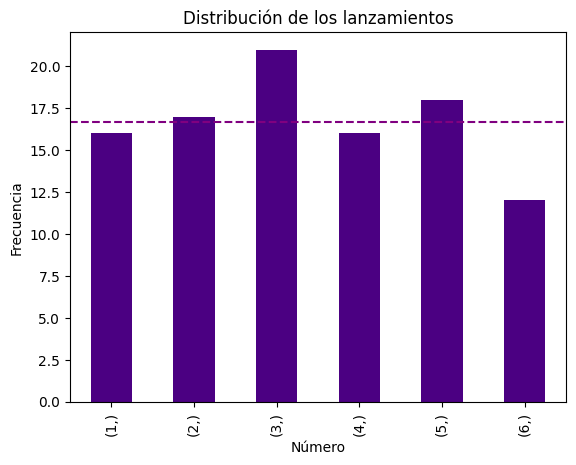

In [ ]:
import pandas as pd

# Definimos un df con el número y las veces que fue lanzado
lanzamientos = pd.DataFrame(codominio2)

# Contamos el número de veces que aparece cada número
conteos = lanzamientos.value_counts().sort_index()

# Graficamos
plt.figure()
conteos.plot(kind='bar', color='indigo')
plt.axhline(y = 0.1666*intentos2, linestyle = '--', color = 'purple')
plt.title('Distribución de los lanzamientos')
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.show()

Que es de esperarse, pues en promedio en cada lanzamiento tenemos $\frac{1}{6} ≈ 1.66$ de probabilidad de elegir cada número.

¡Con esto ya tenemos todas las herramientas para simular nuestro experimento aleatorio!

**Pseudo-Código para simular nuestro experimento aleatorio**

Para poder simular, supondremos que nuestra urna es una lista de Python con bolas numeradas $\texttt{[0,1,2]}$, y que las bolas $0$ y $1$ corresponden a las negras y la $2$ es la blanca. Nuestro objetivo es obtener un número $\texttt{gain}$ que represente nuestra ganancia.

1. Definir $gain = 0$ e $iter$ como el número de ganancia e iteraciones, respectivamente.
1. Simular la elección de un número aleatorio $res$ de la lista $\texttt{[0,1,2]}$.
2. Si $res = 0$ o $res = 2$, entonces $\texttt{gain = gain + 1,500}$. Si no, $\texttt{gain = gain - 1000}$

In [ ]:
# Definimos las variables para comenzar
gain = 0
iter = 100
urna = [0,1,2]

# Simulamos la elección y la ganancia o pérdida de dinero
for i in range(iter):
  res = elegirde(urna)
  if res == 0 or res == 1:
    gain = gain + 1500
  else:
    gain = gain - 1000

# Imprimimos la ganancia total
print(gain)

85000


¿Cómo podemos ver la evolución del proceso a lo largo del tiempo? Conviene almacenar las ganancias en cada momento del proceso y ver cómo evoluciona graficando esto. Para hacer este procedimiento más sencillo, usaremos la siguiente función análogo al procedimiento anterior.

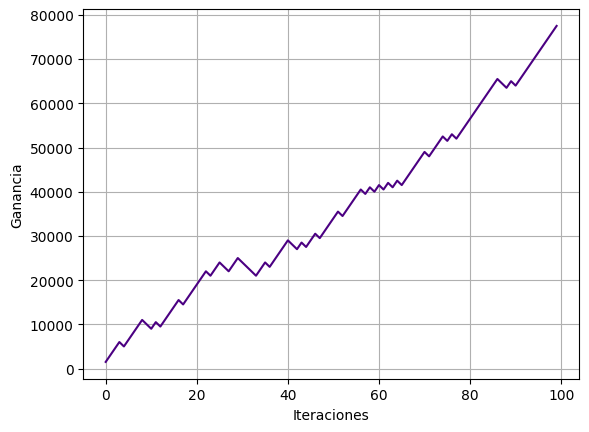

In [ ]:
def experimento(iter):
  # Definimos las variables asociadas
  gain = 0
  urna = [0,1,2]
  ganancias = []
  # Simulamos el experimento
  for i in range(iter):
    res = elegirde(urna)
    if res == 0 or res == 1:
      gain = gain + 1500
    else:
      gain = gain - 1000
    # Guardamos la ganancia en cada paso
    ganancias.append(gain)
  return ganancias

plt.figure()
plt.plot(experimento(100), color = 'indigo')
plt.xlabel('Iteraciones')
plt.ylabel('Ganancia')
plt.grid()
plt.show()

¿Qué pasa si cambiamos un poco el experimento? Podemos cambiar el monto de ganancia, de pérdida y la distribución del color de las bolas en la urna.

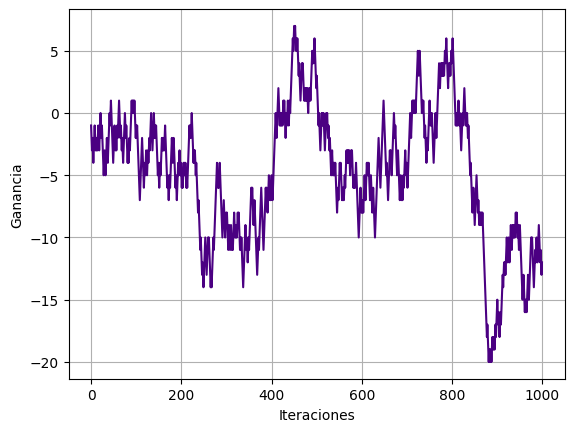

In [ ]:
def experimento_mejorado(iter, u, d, num_urna=int):
  # Definimos las variables asociadas
  gain = 0
  ganancias = []
  # urna = [0,1,2,...,num_urna]
  urna = list(range(num_urna))
  # Simulamos el experimento
  for i in range(iter):
    res = elegirde(urna)
    if res == 0:
      gain = gain + u
    else:
      gain = gain - d
    ganancias.append(gain)
  return ganancias

# Graficamos las ganancias
plt.figure()
plt.plot(experimento_mejorado(1000, 1,1,2), color = 'indigo')
plt.xlabel('Iteraciones')
plt.ylabel('Ganancia')
plt.grid()
plt.show()

¿Dónde has visto este tipo de gráficas? Este es un ejemplo de lo poderoso de la probabilidad, ya que la naturaleza es regida por el azar, y nosotros modelaremos este extraño fenómeno.